In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
uvFile = '/content/drive/MyDrive/weather/uv_20_0506.csv'
uv = pd.read_csv(uvFile)
uv.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(uv.columns)
uv.head()

Index(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'band1', 'band2',
       'band3', 'band4', 'band5', 'band6', 'band7', 'band8', 'band9', 'band10',
       'band11', 'band12', 'band13', 'band14', 'band15', 'band16', 'solarza',
       'sateza', 'esr', 'height', 'landtype'],
      dtype='object')


,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200501,1200,133,127.37212,36.37200,7.6,0.16542,0.15454,0.13590,0.24838,...,264.79664,301.30719,300.56443,295.95717,274.95032,21.76548,42.40541,8.63443,68.94,3
1,20200501,750,165,126.38121,34.81689,0.7,0.16655,0.16253,0.15139,0.17955,...,256.61276,286.47735,286.88642,285.54782,270.62243,65.25262,40.67788,2.13476,38.00,3
2,20200501,800,13,126.16000,33.30000,0.7,0.15239,0.14485,0.12696,0.13167,...,249.15195,270.68154,269.08984,266.94653,255.14159,63.41637,38.96359,3.98237,71.00,0
3,20200501,800,105,128.89098,37.75147,1.5,0.09630,0.08554,0.06825,0.11177,...,259.86773,291.81175,291.98452,289.67404,271.72665,61.21997,43.95463,4.30705,26.04,3
4,20200501,800,108,126.96500,37.57100,0.8,0.23793,0.23552,0.23067,0.26634,...,255.06616,282.63889,283.15970,282.13972,268.43647,62.74639,43.77999,4.08461,85.50,3


In [ ]:
uv['height'].value_counts()

68.94     8721
38.00     8721
71.00     8721
26.04     8721
85.50     8721
68.99     8721
222.80    8721
58.70     8721
47.00     8721
2.28      8721
53.50     8721
62.90     8721
82.00     8721
72.38     8721
69.56     8721
Name: height, dtype: int64

In [ ]:
uv['lon'].value_counts()

127.37212    8721
126.38121    8721
126.16000    8721
128.89098    8721
126.96500    8721
126.62490    8721
130.89864    8721
127.44066    8721
126.33000    8721
129.37962    8721
128.65295    8721
127.11900    8721
129.33472    8721
126.89158    8721
129.03203    8721
Name: lon, dtype: int64

In [ ]:
uv['lat'].value_counts()

36.37200    8721
34.81689    8721
33.30000    8721
37.75147    8721
37.57100    8721
37.47772    8721
37.48129    8721
36.63924    8721
36.54000    8721
36.03259    8721
35.87797    8721
35.84080    8721
35.58250    8721
35.17294    8721
35.10468    8721
Name: lat, dtype: int64

In [ ]:
uv['stn'].value_counts()

133    8721
165    8721
13     8721
105    8721
108    8721
112    8721
115    8721
131    8721
132    8721
138    8721
143    8721
146    8721
152    8721
156    8721
159    8721
Name: stn, dtype: int64

In [ ]:
uv['hhnn'].value_counts()

1200    915
2350    915
2300    915
2310    915
2230    915
       ... 
50      915
0       915
10      915
1550    915
620     885
Name: hhnn, Length: 143, dtype: int64

In [ ]:
#정규화
mean = uv.mean(axis=0)
uv -= mean
std = uv.std(axis=0)
uv /= std

In [ ]:
uv.head()

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,-1.26564,0.024407,0.163144,-0.333807,0.226543,0.154470,0.188090,0.145271,0.083190,0.517266,...,1.216700,1.361442,1.328524,1.251515,1.056161,-1.439207,0.217431,1.351759,0.006486,0.478343
1,-1.26564,-0.629585,1.063249,-1.053752,-1.088364,0.046839,0.194456,0.190087,0.169290,0.169805,...,0.429592,0.617305,0.657218,0.723311,0.757636,-0.225013,-1.072528,0.028463,-0.660935,0.478343
2,-1.26564,-0.556919,-3.212249,-1.214473,-2.370955,0.046839,0.114685,0.090919,0.033498,-0.071898,...,-0.287973,-0.175302,-0.216224,-0.220578,-0.310188,-0.276282,-2.352600,0.404626,0.050923,-1.913371
3,-1.26564,-0.556919,-0.624448,0.769721,1.392940,0.059318,-0.201300,-0.241754,-0.292835,-0.172355,...,0.742648,0.884977,0.907429,0.932689,0.833802,-0.337607,1.374244,0.470729,-0.918929,0.478343
4,-1.26564,-0.556919,-0.540063,-0.629600,1.240346,0.048399,0.596578,0.599492,0.609959,0.607930,...,0.280843,0.424698,0.474314,0.550373,0.606855,-0.294988,1.243839,0.425442,0.363709,0.478343


In [ ]:
#feature, target 분류
feature = uv[['band1', 'band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'band8', 'band9', 'band10',
                  'band11', 'band12', 'band13', 'band14', 'band15', 'band16', 'solarza', 'esr']]
target = uv[['uv']]

In [ ]:
# 모델 만들기
X = tf.keras.layers.Input(shape=[18]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X) # 10
y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X,y)
model.compile(optimizer='rmsprop',loss='mae', metrics=["acc"])

In [ ]:
history = model.fit(feature,target,batch_size=15,epochs=10)

Epoch 1/10
8721/8721 [==============================] - 19s 2ms/step - loss: 0.0801 - acc: 0.0000e+00
Epoch 2/10
8721/8721 [==============================] - 19s 2ms/step - loss: 0.0709 - acc: 0.0000e+00
Epoch 3/10
8721/8721 [==============================] - 18s 2ms/step - loss: 0.0696 - acc: 0.0000e+00
Epoch 4/10
8721/8721 [==============================] - 18s 2ms/step - loss: 0.0693 - acc: 0.0000e+00
Epoch 5/10
8721/8721 [==============================] - 18s 2ms/step - loss: 0.0692 - acc: 0.0000e+00
Epoch 6/10
8721/8721 [==============================] - 18s 2ms/step - loss: 0.0691 - acc: 0.0000e+00
Epoch 7/10
8721/8721 [==============================] - 18s 2ms/step - loss: 0.0690 - acc: 0.0000e+00
Epoch 8/10
8721/8721 [==============================] - 19s 2ms/step - loss: 0.0690 - acc: 0.0000e+00
Epoch 9/10
8721/8721 [==============================] - 19s 2ms/step - loss: 0.0689 - acc: 0.0000e+00
Epoch 10/10
8721/8721 [==============================] - 19s 2ms/step - loss: 0.06

In [ ]:
model.predict(feature[:5])

array([[0.15381537],
       [0.046101  ],
       [0.0500645 ],
       [0.06039992],
       [0.04441442]], dtype=float32)

In [ ]:
target[:5]

,uv
0,0.154470
1,0.046839
2,0.046839
3,0.059318
4,0.048399


In [ ]:
print(history.history['loss'])
print(history.history['acc'])
#print(history.history['val_loss'])
#print(history.history['val_acc'])

[0.08007987588644028, 0.07086888700723648, 0.06963322311639786, 0.06934072822332382, 0.06917380541563034, 0.06907851994037628, 0.06901536881923676, 0.06895967572927475, 0.06892821937799454, 0.06890705972909927]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


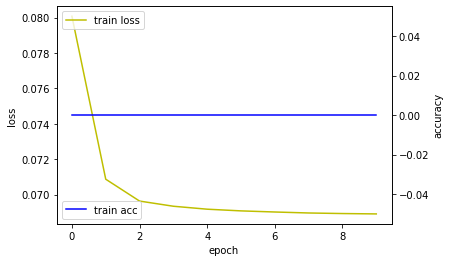

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'],'y',label='train loss')
# loss_ax.plot(hist.history['val_loss'],'r',label='val loss')
acc_ax.plot(history.history['acc'],'b',label='train acc')
# acc_ax.plot(hist.history['val_acc'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
uvFile = '/content/drive/MyDrive/weather/uv_20_0506.csv'
uv = pd.read_csv(uvFile)
uv.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(uv.columns)
uv.head()